# Moons Data

In [368]:
#!/usr/bin/env python
 
# TODO Perhaps this approach actually worked and I was measuring the misclassification rate incorrectly?
# TODO Perhaps the Loss function is why this approach performed so poorly?
# TODO Implement testing and training data
  # TODO Implement a plot of both Testing and Training Data
# TODO Implement a method to intelligently exit the loop
 
#-- Import Packages -------------------------------------------
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt


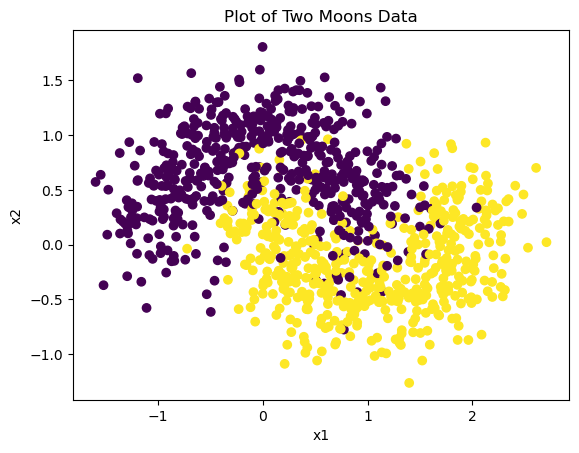

In [369]:
 
#-- Generate Two Moons Data -----------------------------------
X, y = datasets.make_moons(n_samples = 1000, noise = 0.3, random_state = 0)
y = np.reshape(y, (len(y), 1)) # Make y vertical n x 1 matrix.
 
# Plot the Generated Data -----------------------------------
    # Make an empty figure
plt.ion()
p = plt.figure()
    # Create the Scatter Plot
plt.scatter(X[:,0], X[:, 1], c = y)
    # Labels
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot of Two Moons Data")
    # Show the Plot
plt.show()
 

In [370]:

#-- Split data into Training and Test Sets --------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
 

In [388]:
def slide(hiddenlayer1):
    display(hiddenlayer1)
    return hiddenlayer1

slidertest = interactive(slide, hiddenlayer1=testingwidget)  # edit this below

## Can I use just that slide function for multiple widgets? 
inputlayers = interactive(slide, hiddenlayer1=[nn.Sigmoid, nn.Linear])
## can't use the same widget


display(slidertest)
display(inputlayers)

slidertest.result + 2
inputlayers.result()

ValueError: cannot find widget or abbreviation for argument: 'x'

In [372]:
# use the result from here into the out_features? But it doesn't update automatically
slidertest.result + 5

13

In [373]:
# Fit the Neural Network ------------------------------------
## Import the Packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
## Create Tensors
device = 'cpu'
dtype = float
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))
 
## Define a model
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=slidertest.result),
   # nn.ReLU(),
     nn.Sigmoid(),
#     inputlayers.result(),
    nn.Linear(slidertest.result, 3),
    nn.Sigmoid(),
    nn.Linear(3, 1),
   # nn.Sigmoid(),
)
 
## Define a Loss Function
loss_fn = torch.nn.BCEWithLogitsLoss()
## Define an Optimizer
eta = 1e-1
optimizer = torch.optim.RMSprop(model.parameters(), lr = eta)



In [374]:
import os
## Train the Model
for t in range(100):
    # Forward Pass: Compute predicted y value
    y_pred = model(X.float())
 
    # Measure the Loss
    loss = loss_fn(y_pred, y)
    if t % 100 == 0:
        print(t, '\t', loss.item())
 
    # Backward Pass; Compute the Partial Derivatives
    ## First Zero the Gradients, otherwise the can't be overwritten
    optimizer.zero_grad()
 
    ## Now calculate the gradients
    loss.backward()
 
    # Adjust the Weights
    optimizer.step()

0 	 0.7286227941513062


In [375]:
# # Measure the Misclassification Rate ------------------------
# yhat = model.forward(X).detach().numpy().reshape((1, -1))
# yhat = [i>0.5 for i in yhat ]
# yhat = np.array(yhat).astype(int)
# y = y.detach().numpy().reshape(1, -1).astype(int)
 

# misclassification_rate_nn = tools.misclassification_rate(yhat, y)
# misclassification_rate_tree = tools.misclassification_rate(clf.predict(X), y)
 
# # misclassification_rate_nn = np.average(yhat == y.reshape(1, -1))
# # [i == j for i in yhat for j in y.reshape(1, -1)]
 
# print("The misclassification rate tree is:\n", misclassification_rate_tree)
# print("The misclassification rate network is:\n", misclassification_rate_nn)

In [376]:
print(
    min(X[:,0]),
    max(X[:,0])
)

tensor(-1.5978) tensor(2.7070)


In [377]:
print(
    min(X[:,1]),
    max(X[:,1])
)

tensor(-1.2628) tensor(1.8052)


In [378]:
yu = max(X[:,0])
yl = min(X[:,0])
xu = max(X[:,1])
xl = min(X[:,1])

In [379]:
N = 100
rows = [yl + i*(yu-yl)/N for i in range(N)]
cols = [xl + i*(xu-xl)/N for i in range(N)]


In [380]:
d = np.zeros((N, N))

In [381]:
for i in range(d.shape[0]):
    for j in range(d.shape[0]):
        x1 = rows[i]
        x2 = cols[j] 
        out = model(torch.tensor([x1, x2]))
        out = torch.detach(out)
        d[i,j] = out

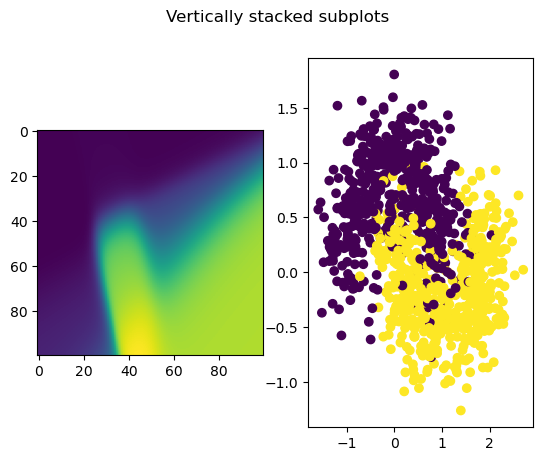

In [382]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Vertically stacked subplots')
axs[0].imshow((np.rot90(d)))
axs[1].scatter(X[:,0], X[:, 1], c = y)

(array([30.,  2.,  1.,  1.,  1.,  1., 22.,  2.,  2., 38.]),
 array([-5.10502911, -3.70634251, -2.30765591, -0.90896931,  0.48971729,
         1.88840389,  3.28709049,  4.68577709,  6.08446369,  7.48315029,
         8.88183689]),
 <BarContainer object of 10 artists>)

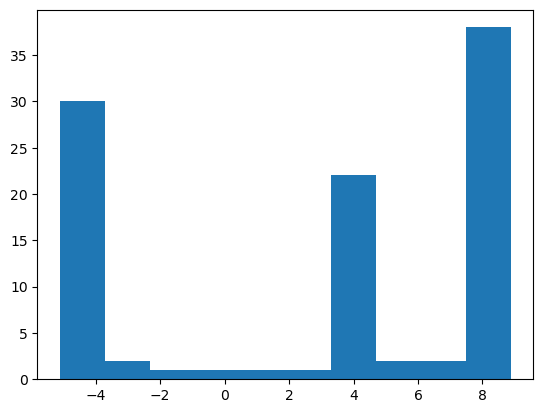

In [122]:
plt.hist(d[:,2])

In [383]:
##################  PLAYING WITH WIDGETS

import ipywidgets as widgets
from ipywidgets import interactive, interact
from IPython.display import display, Javascript

In [384]:
## widget for integer slider
testingwidget = (widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description="Test:",
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    reeeaaadout_format='d'
))

display(testingwidget)

IntSlider(value=7, description='Test:', max=10)

In [385]:
## working example using `interactive`
def f(x):
    return x

## NOTEE: When using the same widget (i.e. testingwidget, it affects all uses of it ^)
testslider = interactive(f, x=testingwidget)

## use `display()` to show the slider
display(testslider)

## use `.result()` to be able to use the output
testslider.result + 8

interactive(children=(IntSlider(value=7, description='Test:', max=10), Output()), _dom_classes=('widget-intera…

15

In [386]:
y = [1]
@interact(x=(0,100))
def double_number(x):
    # Must be array as they are pass by reference
    # Well not really, it's called something else in Py.
    y[0] = x*2
    
    print(y)

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

In [329]:
## Run all cells below the button 

from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Run cells below")
button.on_click(run_all)

## 
display(button)

<IPython.core.display.Javascript object>

Button(description='Run cells below', style=ButtonStyle())

In [330]:
slidertest.result+2

10

In [331]:
slidertest.result+10

18